In [100]:
# -------------------- READ ME -------------------- #

# CAMINHO 1
# Para rodar esse arquivo você deve instalar o pip abaixo.
# Além disso, ter uma conta na google cloud e em "billing_project_id" colocar o ID do seu projeto

# CAMINHO 2
# Caso não deseje fazer instalações e demais, ao final na Análise Exploratória dos Dados é gerado um arquivo .csv
# Você pode executar o código a partir da seção Processamento dos Dados
# Lembre-se de executar as Bibliotecas !

# ------------------------------------------------- #

In [1]:
#!pip install basedosdados

### Introdução

Essa análise faz parte do projeto final do curso de Técnicas de Programação I da Let's Code from Ada do programa Diversidade Tech

### Conceito

O projeto tem como finalidade analisar os dados de vacinação contra COVID-19 dos Estados do Nordeste no período de 2021, trazendo visibilidade sobre gênero, raça/cor e fabricantes das vacinas aplicadas nos 09 Estados que compõe a região do nordeste do Brasil.

Base: [Base dos Dados](https://basedosdados.org/dataset/br-ms-vacinacao-covid19?bdm_table=microdados_vacinacao)
Cores: [Paleta 1](https://colorhunt.co/palette/e26a2cff8243fda65dffd07f) | [Paleta 2](https://colorhunt.co/palette/6f07654c0045bd512fffb228)

### Bibliotecas

In [2]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt

#### Definindo Tamanho da Amostra

Por conta do custo computacional para carregar as análises, foi calculado um tamanho de amostra que representasse os vacinados contra COVID-19 para cada Estado da região nordeste.

In [3]:
z = 1.96 #Z-score para 95% de confiança
e = 0.02 #2% de margem de erro 
p = 0.5 #50% desvio padrão 

sample_size = ((z ** 2) *p*(1-p))/(e**2)
print(f'Tamanho da amostra {round(sample_size,1)}')

Tamanho da amostra 2401.0


### Dados de Doses de Vacina no NE 

In [14]:
query_vacina = "(SELECT estado_ma.sigla_uf, estado_ma.nome_fabricante, estado_ma.data_aplicacao, estado_ma.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_ma WHERE estado_ma.sigla_uf = 'MA' AND estado_ma.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_ce.sigla_uf, estado_ce.nome_fabricante, estado_ce.data_aplicacao, estado_ce.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_ce WHERE estado_ce.sigla_uf = 'CE' AND estado_ce.data_aplicacao > '2021-01-01' LIMIT 2401)\
UNION ALL \
(SELECT estado_rn.sigla_uf, estado_rn.nome_fabricante, estado_rn.data_aplicacao, estado_rn.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_rn WHERE estado_rn.sigla_uf = 'RN' AND estado_rn.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_pb.sigla_uf, estado_pb.nome_fabricante, estado_pb.data_aplicacao, estado_pb.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_pb WHERE estado_pb.sigla_uf = 'PB' AND estado_pb.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_pe.sigla_uf, estado_pe.nome_fabricante, estado_pe.data_aplicacao, estado_pe.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_pe WHERE estado_pe.sigla_uf = 'PE' AND estado_pe.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_al.sigla_uf, estado_al.nome_fabricante, estado_al.data_aplicacao, estado_al.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_al WHERE estado_al.sigla_uf = 'AL' AND estado_al.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_se.sigla_uf, estado_se.nome_fabricante, estado_se.data_aplicacao, estado_se.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_se WHERE estado_se.sigla_uf = 'SE' AND estado_se.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_ba.sigla_uf, estado_ba.nome_fabricante, estado_ba.data_aplicacao, estado_ba.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_ba WHERE estado_ba.sigla_uf = 'BA' AND estado_ba.data_aplicacao > '2021-01-01' LIMIT 2401) \
UNION ALL \
(SELECT estado_pi.sigla_uf, estado_pi.nome_fabricante, estado_pi.data_aplicacao, estado_pi.dose FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` as estado_pi WHERE estado_pi.sigla_uf = 'PI' AND estado_pi.data_aplicacao > '2021-01-01' LIMIT 2401)"

In [15]:
df = bd.read_sql(query = query_vacina, billing_project_id='YOUR_PROJECT_ID')

Downloading: 100%|██████████| 21609/21609 [00:01<00:00, 16622.42rows/s]


In [16]:
df.head()

,sigla_uf,nome_fabricante,data_aplicacao,dose
0,BA,PFIZER,2021-10-21,2ª Dose
1,BA,PFIZER,2021-06-30,1ª Dose
2,BA,PFIZER,2021-11-18,2ª Dose
3,BA,PFIZER,2022-01-07,Reforço
4,BA,PFIZER,2021-08-07,1ª Dose


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sigla_uf         21609 non-null  object
 1   nome_fabricante  21609 non-null  object
 2   data_aplicacao   21609 non-null  dbdate
 3   dose             21609 non-null  object
dtypes: dbdate(1), object(3)
memory usage: 675.4+ KB


### Dados de Pacientes vacinados no NE

In [19]:
query_pacientes = "(SELECT estado_ma.sigla_uf_endereco, estado_ma.sexo, estado_ma.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_ma WHERE estado_ma.sigla_uf_endereco = 'MA' LIMIT 2401) \
UNION ALL (SELECT estado_ce.sigla_uf_endereco, estado_ce.sexo, estado_ce.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_ce WHERE estado_ce.sigla_uf_endereco = 'CE' LIMIT 2401) \
UNION ALL (SELECT estado_rn.sigla_uf_endereco, estado_rn.sexo, estado_rn.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_rn WHERE estado_rn.sigla_uf_endereco = 'RN' LIMIT 2401) \
UNION ALL (SELECT estado_pb.sigla_uf_endereco, estado_pb.sexo, estado_pb.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_pb WHERE estado_pb.sigla_uf_endereco = 'PB' LIMIT 2401) \
UNION ALL (SELECT estado_al.sigla_uf_endereco, estado_al.sexo, estado_al.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_al WHERE estado_al.sigla_uf_endereco = 'AL' LIMIT 2401) \
UNION ALL (SELECT estado_se.sigla_uf_endereco, estado_se.sexo, estado_se.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_se WHERE estado_se.sigla_uf_endereco = 'SE' LIMIT 2401) \
UNION ALL (SELECT estado_ba.sigla_uf_endereco, estado_ba.sexo, estado_ba.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_ba WHERE estado_ba.sigla_uf_endereco = 'BA' LIMIT 2401) \
UNION ALL (SELECT estado_pi.sigla_uf_endereco, estado_pi.sexo, estado_pi.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_pi WHERE estado_pi.sigla_uf_endereco = 'PI' LIMIT 2401)\
UNION ALL (SELECT estado_pe.sigla_uf_endereco, estado_pe.sexo, estado_pe.raca_cor FROM `basedosdados.br_ms_vacinacao_covid19.microdados_paciente` as estado_pe WHERE estado_pe.sigla_uf_endereco = 'PE' LIMIT 2401)"

In [20]:
df_paciente = bd.read_sql(query = query_pacientes, billing_project_id='YOUR_PROJECT_ID')
df_paciente.head()

Downloading: 100%|██████████| 21609/21609 [00:00<00:00, 24074.76rows/s]


,sigla_uf_endereco,sexo,raca_cor
0,PB,M,4
1,PB,F,3
2,PB,M,3
3,PB,M,4
4,PB,M,99


In [21]:
df_paciente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sigla_uf_endereco  21609 non-null  object
 1   sexo               21609 non-null  object
 2   raca_cor           21609 non-null  object
dtypes: object(3)
memory usage: 506.6+ KB


### Unindo Tabelas

In [22]:
df_paciente = df_paciente.sort_values('sigla_uf_endereco').reset_index(drop = True)
df_paciente

,sigla_uf_endereco,sexo,raca_cor
0,AL,F,3
1,AL,M,3
2,AL,F,1
3,AL,F,3
4,AL,M,4
...,...,...,...
21604,SE,F,99
21605,SE,F,4
21606,SE,M,3
21607,SE,F,3


In [23]:
df = df.sort_values('sigla_uf').reset_index(drop = True)
df

,sigla_uf,nome_fabricante,data_aplicacao,dose
0,AL,PFIZER,2021-09-18,2ª Dose
1,AL,SINOVAC/BUTANTAN,2021-07-22,1ª Dose
2,AL,SINOVAC/BUTANTAN,2021-02-26,1ª Dose
3,AL,SINOVAC/BUTANTAN,2021-03-01,2ª Dose
4,AL,SINOVAC/BUTANTAN,2021-09-14,1ª Dose
...,...,...,...,...
21604,SE,ASTRAZENECA/FIOCRUZ,2021-06-09,1ª Dose
21605,SE,ASTRAZENECA/FIOCRUZ,2021-05-19,1ª Dose
21606,SE,ASTRAZENECA/FIOCRUZ,2021-08-02,2ª Dose
21607,SE,ASTRAZENECA/FIOCRUZ,2021-08-04,2ª Dose


In [24]:
df_vacinacao = pd.concat([df,df_paciente],axis = 1)
df_vacinacao

,sigla_uf,nome_fabricante,data_aplicacao,dose,sigla_uf_endereco,sexo,raca_cor
0,AL,PFIZER,2021-09-18,2ª Dose,AL,F,3
1,AL,SINOVAC/BUTANTAN,2021-07-22,1ª Dose,AL,M,3
2,AL,SINOVAC/BUTANTAN,2021-02-26,1ª Dose,AL,F,1
3,AL,SINOVAC/BUTANTAN,2021-03-01,2ª Dose,AL,F,3
4,AL,SINOVAC/BUTANTAN,2021-09-14,1ª Dose,AL,M,4
...,...,...,...,...,...,...,...
21604,SE,ASTRAZENECA/FIOCRUZ,2021-06-09,1ª Dose,SE,F,99
21605,SE,ASTRAZENECA/FIOCRUZ,2021-05-19,1ª Dose,SE,F,4
21606,SE,ASTRAZENECA/FIOCRUZ,2021-08-02,2ª Dose,SE,M,3
21607,SE,ASTRAZENECA/FIOCRUZ,2021-08-04,2ª Dose,SE,F,3


In [25]:
df_vacinacao["sigla_uf_endereco"].unique()

array(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'], dtype=object)

In [26]:
df_vacinacao["sigla_uf"].unique()

array(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'], dtype=object)

In [27]:
df_vacinacao.drop('sigla_uf_endereco',axis=1)

,sigla_uf,nome_fabricante,data_aplicacao,dose,sexo,raca_cor
0,AL,PFIZER,2021-09-18,2ª Dose,F,3
1,AL,SINOVAC/BUTANTAN,2021-07-22,1ª Dose,M,3
2,AL,SINOVAC/BUTANTAN,2021-02-26,1ª Dose,F,1
3,AL,SINOVAC/BUTANTAN,2021-03-01,2ª Dose,F,3
4,AL,SINOVAC/BUTANTAN,2021-09-14,1ª Dose,M,4
...,...,...,...,...,...,...
21604,SE,ASTRAZENECA/FIOCRUZ,2021-06-09,1ª Dose,F,99
21605,SE,ASTRAZENECA/FIOCRUZ,2021-05-19,1ª Dose,F,4
21606,SE,ASTRAZENECA/FIOCRUZ,2021-08-02,2ª Dose,M,3
21607,SE,ASTRAZENECA/FIOCRUZ,2021-08-04,2ª Dose,F,3


### Análise Exploratória

In [28]:
df_vacinacao['dose'].unique()

array(['2ª Dose', '1ª Dose', 'Reforço', 'Dose Adicional',
       '2ª Dose Revacinação', 'Dose Única', 'Única', '4ª Dose', '3ª Dose',
       'Dose Inicial'], dtype=object)

In [29]:
df_vacinacao['raca_cor'].unique()

array(['3', '1', '4', '99', '2', '5'], dtype=object)

In [30]:
df_vacinacao['nome_fabricante'].unique()

array(['PFIZER', 'SINOVAC/BUTANTAN', 'ASTRAZENECA/FIOCRUZ', 'ASTRAZENECA',
       'JANSSEN'], dtype=object)

##### Substituindo valores

In [31]:
df_vacinacao.replace('Dose Única','1ª Dose', inplace= True)

In [32]:
df_vacinacao.replace('Única','1ª Dose', inplace= True)

In [33]:
df_vacinacao.replace('Dose Inicial','1ª Dose', inplace= True)

In [34]:
df_vacinacao.replace('Reforço','2ª Dose', inplace= True)

In [60]:
df_vacinacao.replace('2ª Dose Revacinação','2ª Dose', inplace= True)

In [35]:
df_vacinacao.replace('Dose Adicional','3ª Dose', inplace= True)

In [61]:
df_vacinacao['dose'].unique()

array(['2ª Dose', '1ª Dose', '3ª Dose', '4ª Dose'], dtype=object)

De acordo com o dicionário de dados disponibilizados temos que a raça é classificada da seguinte maneira:

1: Branca<br>
2: Preta<br>
3: Parda<br>
4: Amarelo<br>
5: Indígena<br>
99: Sem Informação

In [37]:
df_vacinacao.replace('1','Branca', inplace= True)

In [38]:
df_vacinacao.replace('2','Preta', inplace= True)

In [39]:
df_vacinacao.replace('3','Parda', inplace= True)

In [40]:
df_vacinacao.replace('4','Amarelo', inplace= True)

In [41]:
df_vacinacao.replace('5','Índigena', inplace= True)

In [42]:
df_vacinacao.replace('99','Sem Informação', inplace= True)

In [43]:
df_vacinacao['raca_cor'].unique()

array(['Parda', 'Branca', 'Amarelo', 'Sem Informação', 'Preta',
       'Índigena'], dtype=object)

In [44]:
df_vacinacao.replace('ASTRAZENECA','ASTRAZENECA/FIOCRUZ', inplace= True)

In [45]:
df_vacinacao.to_csv('vacinacao.csv', index=False)

### Processamento dos Dados

In [ ]:
#df_vacinacao = pd.read_csv('vacinacao.csv')

In [46]:
# Percentual de Homens e Mulheres vacinados no NE
total_pessoas = df_vacinacao['sexo'].count()
total_homens = df_vacinacao.loc[(df_vacinacao['sexo']=='M'), 'sexo'].count()
total_mulheres = df_vacinacao.loc[(df_vacinacao['sexo']=='F'), 'sexo'].count()

print(f'O total de vacinados analisados é de {total_pessoas}, sendo {total_homens} homens e {total_mulheres} mulheres')
print(f'Isso representa aproximadamente {round(total_homens/total_pessoas,2) *100}% de homens e {round(total_mulheres/total_pessoas,2)*100}% de mulheres')

O total de vacinados analisados é de 21609, sendo 9993 homens e 11616 mulheres
Isso representa aproximadamente 46.0% de homens e 54.0% de mulheres


In [47]:
#vacinados por Estado do NE
estados_ne = ('AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE')
amostra_estadual = df_vacinacao.loc[(df_vacinacao['sigla_uf']=='AL'), 'sigla_uf'].count()

for i in range(len(estados_ne)):
    homens_vacinado = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['sexo']=='M'), 'sexo'].count()
    print(f'Total homens vacinados em {estados_ne[i]}: {homens_vacinado} --> {round(homens_vacinado/amostra_estadual *100,2)}%')
    mulheres_vacinada = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['sexo']=='F'), 'sexo'].count()
    print(f'Total mulheres vacinadas em {estados_ne[i]}: {mulheres_vacinada} --> {round(mulheres_vacinada/amostra_estadual *100,2)}%\n')
    

Total homens vacinados em AL: 1101 --> 45.86%
Total mulheres vacinadas em AL: 1300 --> 54.14%

Total homens vacinados em BA: 1136 --> 47.31%
Total mulheres vacinadas em BA: 1265 --> 52.69%

Total homens vacinados em CE: 1148 --> 47.81%
Total mulheres vacinadas em CE: 1253 --> 52.19%

Total homens vacinados em MA: 1048 --> 43.65%
Total mulheres vacinadas em MA: 1353 --> 56.35%

Total homens vacinados em PB: 1045 --> 43.52%
Total mulheres vacinadas em PB: 1356 --> 56.48%

Total homens vacinados em PE: 1107 --> 46.11%
Total mulheres vacinadas em PE: 1294 --> 53.89%

Total homens vacinados em PI: 1138 --> 47.4%
Total mulheres vacinadas em PI: 1263 --> 52.6%

Total homens vacinados em RN: 1179 --> 49.1%
Total mulheres vacinadas em RN: 1222 --> 50.9%

Total homens vacinados em SE: 1091 --> 45.44%
Total mulheres vacinadas em SE: 1310 --> 54.56%



> Segundo as análises acima, as mulheres representam 54% do total de vacinados no nordeste enquanto homens 46% da população vacinada. Na distribuição por Estados, homens do Rio Grande do Norte (RN) superam a porcentagem do nordeste com 49% de vacinados. Já a vacinação entre mulheres é liderada pelos Estados da Paraíba(PB) e Maranhão(MA) ambos com cerca de 56% de mulheres vacinadas.

In [48]:
# Total de vacinados por Raça no NE
df_vacinacao['raca_cor'].value_counts()

Parda             7669
Amarelo           5788
Branca            4058
Sem Informação    2994
Preta             1080
Índigena            20
Name: raca_cor, dtype: int64

In [49]:
total_parda = df_vacinacao.loc[(df_vacinacao['raca_cor']=='Parda'), 'raca_cor'].count()
total_amarelo = df_vacinacao.loc[(df_vacinacao['raca_cor']=='Amarelo'), 'raca_cor'].count()
total_branca = df_vacinacao.loc[(df_vacinacao['raca_cor']=='Branca'), 'raca_cor'].count()
total_si = df_vacinacao.loc[(df_vacinacao['raca_cor']=='Sem Informação'), 'raca_cor'].count()
total_preta = df_vacinacao.loc[(df_vacinacao['raca_cor']=='Preta'), 'raca_cor'].count()
total_ind = df_vacinacao.loc[(df_vacinacao['raca_cor']=='Índigena'), 'raca_cor'].count()

print(f'Pardos: {round(total_parda/total_pessoas*100,2)}%')
print(f'Amarelo: {round(total_amarelo/total_pessoas*100,2)}%')
print(f'Branca: {round(total_branca/total_pessoas*100,2)}%')
print(f'Sem Informação: {round(total_si/total_pessoas*100,2)}%')
print(f'Preta: {round(total_preta/total_pessoas*100,2)}%')
print(f'Índigena: {round(total_ind/total_pessoas*100,2)}%')


Pardos: 35.49%
Amarelo: 26.79%
Branca: 18.78%
Sem Informação: 13.86%
Preta: 5.0%
Índigena: 0.09%


In [50]:
# População parda vacinada por Estado do NE

for i in range(len(estados_ne)):
    pardos_vacinados = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['raca_cor']=='Parda'), 'raca_cor'].count()
    print(f'Total de Pardos vacinados em {estados_ne[i]}: {pardos_vacinados} --> {round(pardos_vacinados/amostra_estadual *100,2)}%')
    

Total de Pardos vacinados em AL: 1518 --> 63.22%
Total de Pardos vacinados em BA: 337 --> 14.04%
Total de Pardos vacinados em CE: 1003 --> 41.77%
Total de Pardos vacinados em MA: 944 --> 39.32%
Total de Pardos vacinados em PB: 1016 --> 42.32%
Total de Pardos vacinados em PE: 365 --> 15.2%
Total de Pardos vacinados em PI: 518 --> 21.57%
Total de Pardos vacinados em RN: 724 --> 30.15%
Total de Pardos vacinados em SE: 1244 --> 51.81%


In [51]:
# População Amarela vacinada por Estado do NE

for i in range(len(estados_ne)):
    amarelo_vacinados = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['raca_cor']=='Amarelo'), 'raca_cor'].count()
    print(f'Total de Amarelos vacinados em {estados_ne[i]}: {amarelo_vacinados} --> {round(amarelo_vacinados/amostra_estadual *100,2)}%')
    

Total de Amarelos vacinados em AL: 358 --> 14.91%
Total de Amarelos vacinados em BA: 556 --> 23.16%
Total de Amarelos vacinados em CE: 859 --> 35.78%
Total de Amarelos vacinados em MA: 795 --> 33.11%
Total de Amarelos vacinados em PB: 465 --> 19.37%
Total de Amarelos vacinados em PE: 613 --> 25.53%
Total de Amarelos vacinados em PI: 909 --> 37.86%
Total de Amarelos vacinados em RN: 567 --> 23.62%
Total de Amarelos vacinados em SE: 666 --> 27.74%


In [52]:
# População Branco vacinada por Estado do NE

for i in range(len(estados_ne)):
    branco_vacinados = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['raca_cor']=='Branca'), 'raca_cor'].count()
    print(f'Total de Brancos vacinados em {estados_ne[i]}: {branco_vacinados} --> {round(branco_vacinados/amostra_estadual *100,2)}%')
    

Total de Brancos vacinados em AL: 308 --> 12.83%
Total de Brancos vacinados em BA: 1000 --> 41.65%
Total de Brancos vacinados em CE: 385 --> 16.03%
Total de Brancos vacinados em MA: 399 --> 16.62%
Total de Brancos vacinados em PB: 410 --> 17.08%
Total de Brancos vacinados em PE: 350 --> 14.58%
Total de Brancos vacinados em PI: 195 --> 8.12%
Total de Brancos vacinados em RN: 873 --> 36.36%
Total de Brancos vacinados em SE: 138 --> 5.75%


> Com relação ao recorte de cor e raça, a população parda lidera entre os vacinados (35,4%), seguido pelos autodeclarados amarelos e brancos. Entretanto, a vacinação nos grupos minoritários negros e indígenas é consideravelmente mais baixa, respectivamente 5% e 0.09%. 
>
> A maior participação de pardos vacinados estão nos Estados de Alagoas(AL) e Sergipe(SE) com 63,2% e 51,8%, respectivamente.
> A maior participação de amarelos vacinados estão nos Estados de Piauí(PI) e Ceará(CE) com 37,8% e 35,7%, respectivamente.
> A maior participação de brancos vacinados estão nos Estados de Bahia(BA) e Rio Grande do Norte(RN) com 41,6% e 36,3%, respectivamente.

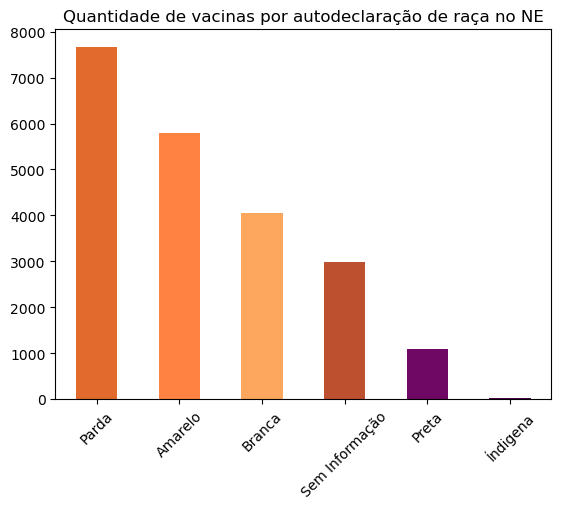

In [53]:
df_vacinacao['raca_cor'].value_counts().plot(kind='bar',color= ['#E26A2C','#FF8243','#FDA65D','#BD512F', '#6F0765', '#4C0045'])
plt.title('Quantidade de vacinas por autodeclaração de raça no NE')
plt.xticks(rotation=45)
plt.show()

In [54]:
df_vacinacao['nome_fabricante'].value_counts()

PFIZER                 8210
ASTRAZENECA/FIOCRUZ    7634
SINOVAC/BUTANTAN       5482
JANSSEN                 283
Name: nome_fabricante, dtype: int64

In [55]:
total_pfizer = df_vacinacao.loc[(df_vacinacao['nome_fabricante']=='PFIZER'), 'nome_fabricante'].count()
total_astrazeneca = df_vacinacao.loc[(df_vacinacao['nome_fabricante']=='ASTRAZENECA/FIOCRUZ'), 'nome_fabricante'].count()
total_sinovac = df_vacinacao.loc[(df_vacinacao['nome_fabricante']=='SINOVAC/BUTANTAN'), 'nome_fabricante'].count()
total_janssen = df_vacinacao.loc[(df_vacinacao['nome_fabricante']=='JANSSEN'), 'nome_fabricante'].count()

print(f'Pfizer: {round(total_pfizer/total_pessoas*100,2)}%')
print(f'Astrazeneca: {round(total_astrazeneca/total_pessoas*100,2)}%')
print(f'Sinovac: {round(total_sinovac /total_pessoas*100,2)}%')
print(f'Janssen: {round(total_janssen/total_pessoas*100,2)}%')


Pfizer: 37.99%
Astrazeneca: 35.33%
Sinovac: 25.37%
Janssen: 1.31%


In [56]:
 # Estados com mais vacinas Pfizer aplicadas

for i in range(len(estados_ne)):
    pfizer = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['nome_fabricante']=='PFIZER'), 'nome_fabricante'].count()
    print(f'Total de vacinas Pfizer aplicados em {estados_ne[i]}: {pfizer} --> {round(pfizer/amostra_estadual *100,2)}%')
    

Total de vacinas Pfizer aplicados em AL: 923 --> 38.44%
Total de vacinas Pfizer aplicados em BA: 913 --> 38.03%
Total de vacinas Pfizer aplicados em CE: 871 --> 36.28%
Total de vacinas Pfizer aplicados em MA: 804 --> 33.49%
Total de vacinas Pfizer aplicados em PB: 907 --> 37.78%
Total de vacinas Pfizer aplicados em PE: 907 --> 37.78%
Total de vacinas Pfizer aplicados em PI: 969 --> 40.36%
Total de vacinas Pfizer aplicados em RN: 920 --> 38.32%
Total de vacinas Pfizer aplicados em SE: 996 --> 41.48%


In [57]:
 # Estados com mais vacinas Astrazeneca aplicadas

for i in range(len(estados_ne)):
    astrazeneca = df_vacinacao.loc[(df_vacinacao['sigla_uf']==estados_ne[i]) & (df_vacinacao['nome_fabricante']=='ASTRAZENECA/FIOCRUZ'), 'nome_fabricante'].count()
    print(f'Total de vacinas Astrazeneca aplicados em {estados_ne[i]}: {astrazeneca} --> {round(astrazeneca/amostra_estadual *100,2)}%')
    

Total de vacinas Astrazeneca aplicados em AL: 856 --> 35.65%
Total de vacinas Astrazeneca aplicados em BA: 797 --> 33.19%
Total de vacinas Astrazeneca aplicados em CE: 784 --> 32.65%
Total de vacinas Astrazeneca aplicados em MA: 1069 --> 44.52%
Total de vacinas Astrazeneca aplicados em PB: 791 --> 32.94%
Total de vacinas Astrazeneca aplicados em PE: 824 --> 34.32%
Total de vacinas Astrazeneca aplicados em PI: 828 --> 34.49%
Total de vacinas Astrazeneca aplicados em RN: 848 --> 35.32%
Total de vacinas Astrazeneca aplicados em SE: 837 --> 34.86%


> No cenário das fabricantes de vacinas contra COVID-19 é possível perceber que as doses foram majoritariamente da Pfizer e Astrazeneca/Fiocruz, com respectivamente 37,9% e 35,3%.
>
> A Pfizer foi aplicada principalmente, dentre os Estados do NE, no Estado de Sergipe(SE) e Piauí(PI) com 41,4% e 40,3% respectivamente. Já a Astrazeneca/Fiocruz concentrou-se no Estado do Maranhã(MA) com 46,4%

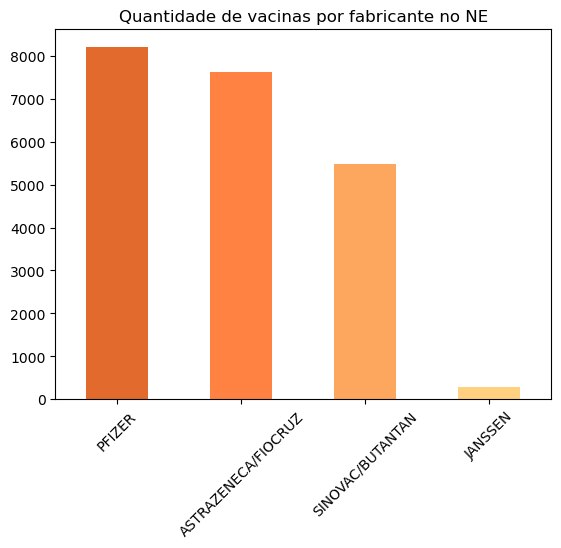

In [58]:
df_vacinacao['nome_fabricante'].value_counts().plot(kind='bar',color= ['#E26A2C','#FF8243','#FDA65D','#FFD07F'])
plt.title('Quantidade de vacinas por fabricante no NE')
plt.xticks(rotation=45)
plt.show()

### Gráficos

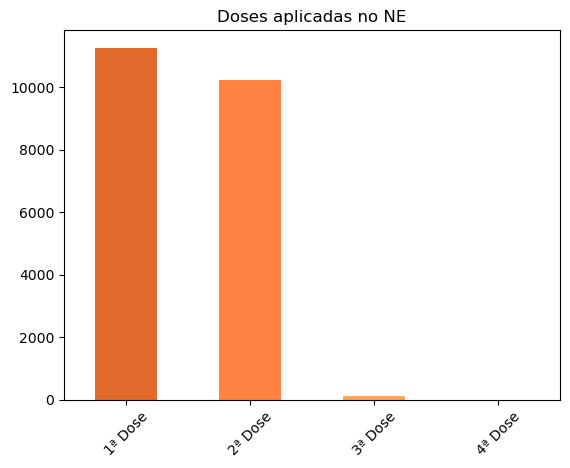

In [62]:
df_vacinacao['dose'].value_counts().plot(kind='bar',color= ['#E26A2C','#FF8243','#FDA65D'])
plt.title('Doses aplicadas no NE')
plt.xticks(rotation=45)
plt.show()